In [1]:
import os
from pathlib import Path
import cv2
import pytesseract
import numpy 
from PIL import Image
import matplotlib.pyplot as plt


In [2]:
pytesseract.pytesseract.tesseract_cmd =r'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'

In [3]:
def preprocess_image(image_path):
    if not os.path.exists(image_path):
        print(f"image does not exist at path: {image_path}")
        return None,None
    else:
        image = cv2.imread(image_path)
        if image is None:
            print(f"failed to load the image")
            return None,None
        try:
            gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
        except cv2.error as e:
            print(f"Error during image conversion: {e}")
            return None,None
        resized_imaged = cv2.resize(gray_image, (224,224))
        text = pytesseract.image_to_string(resized_imaged)
        return resized_imaged, text

In [18]:
img_path = r"D:\amazon\Optical-Character-Recognition\images\51+oHGvSvuL.jpg"
resized, text = preprocess_image(img_path)


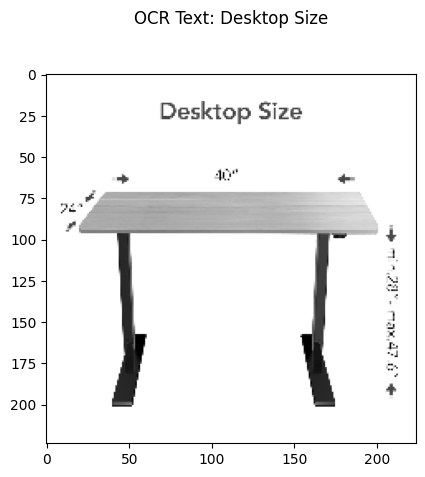

In [19]:
plt.imshow(resized,cmap='gray')
plt.title(f"OCR Text: {text}")
plt.show()